# Unsupervised Learning

## K-means

In [28]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2,  2.3], [-1.5,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)
k= 5

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


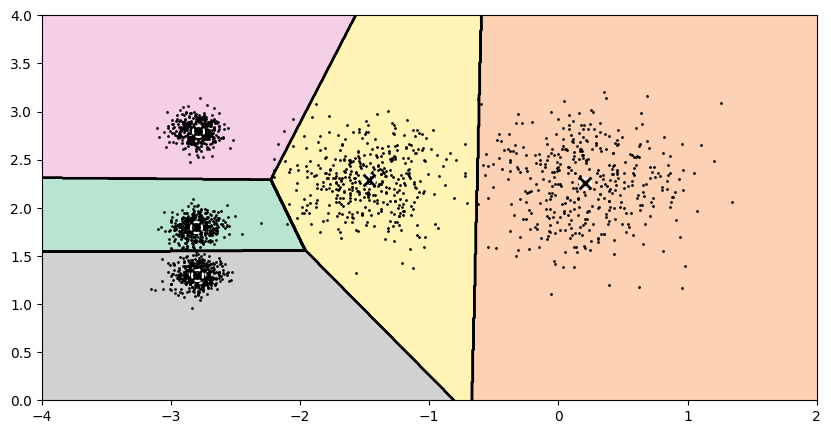

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# plt.plot(X[:, 0], X[:, 1], 'ko', size=(1,1))

x1,x2 = np.meshgrid(np.linspace(-4, 2, 1000), np.linspace(0, 4, 1000))
xs_all = np.c_[x1.ravel(), x2.ravel()]
y_pred = kmeans.predict(xs_all).reshape(x1.shape)
plt.scatter(X[:,0], X[:, 1], s=1, c='k')
plt.contourf(x1, x2, y_pred, zorder=-2, alpha=0.9, cmap='Pastel2')
plt.contour(x1, x2, y_pred, zorder=-2, colors='k')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=2, marker='o',color='w', linewidths=8)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=2, marker='x',color='k', linewidths=12)

In [43]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


### centroid initialization methods

In [45]:
# If you know a good approximation of centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.59853725816836

In [46]:
kmeans.score(X)

-211.59853725816836

### K-mean ++

To avoid choosing bad starting centroids a new algorithm was proposed. It consists on giving a higher chance to choose points further away from the already selected centroids

### Accelerated k-mean and mini-batch k-means

In [48]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


211.652398504332

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it 

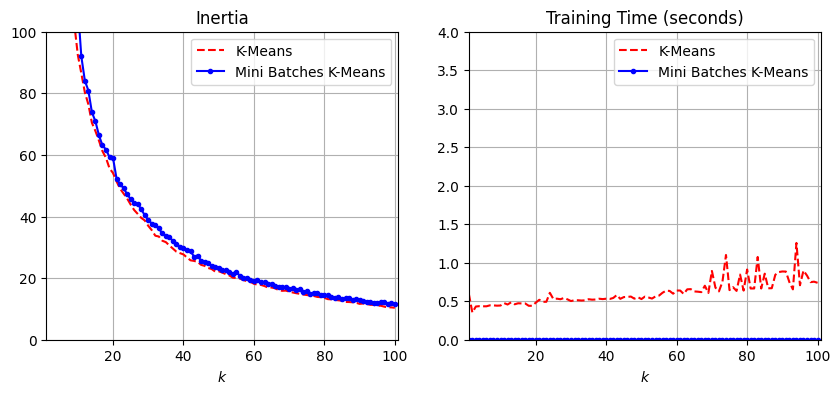

In [50]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))

for k in range(1, max_k + 1):
    kmeans_time = KMeans(random_state=42, n_clusters=k, algorithm="full")
    minikmeans_time = MiniBatchKMeans(random_state=42, n_clusters=k)
    times[k-1,0] = timeit('kmeans_time.fit(X)', number=10, globals=globals())
    times[k-1,0] = timeit('minikmeans_time.fit(X)', number=10, globals=globals())
    inertias[k-1,0] = kmeans_time.inertia_
    inertias[k-1,1] = minikmeans_time.inertia_

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:,0], 'r--', label='K-Means')
plt.plot(range(1, max_k + 1), inertias[:,1], 'b.-', label='Mini Batches K-Means')
plt.xlabel(r"$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k+1, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:,0], 'r--', label='K-Means')
plt.plot(range(1, max_k + 1), times[:,1], 'b.-', label='Mini Batches K-Means')
plt.xlabel(r"$k$")
plt.title("Training Time (seconds)")
plt.legend()
plt.axis([1, max_k+1, 0, 4])
plt.grid()


### Finding the optimal number of clusters

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: Futur

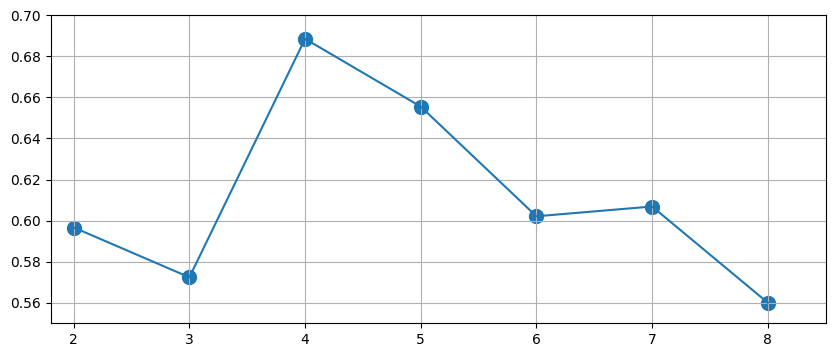

In [58]:
from sklearn.metrics import silhouette_score

k_max = 8
silhouette_scores = np.zeros(k_max-1).reshape(-1,1)
for i in range (2, k_max + 1):
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit(X)
    silhouette_scores[i-2, 0] = silhouette_score(X, kmeans_test.labels_)

plt.figure(figsize=(10, 4))
plt.plot(range(2, k_max+1), silhouette_scores)
plt.scatter(range(2, k_max+1), silhouette_scores, s=100)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()